In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.titlesize'] = 20

### Read image file

In [2]:
with rio.open('Clip_Zone01_1OCT2019_bgre.tif', 'r+') as src:
    saltlake_csf = src.read()
    saltlake_csf_meta = src.meta

### Display image data

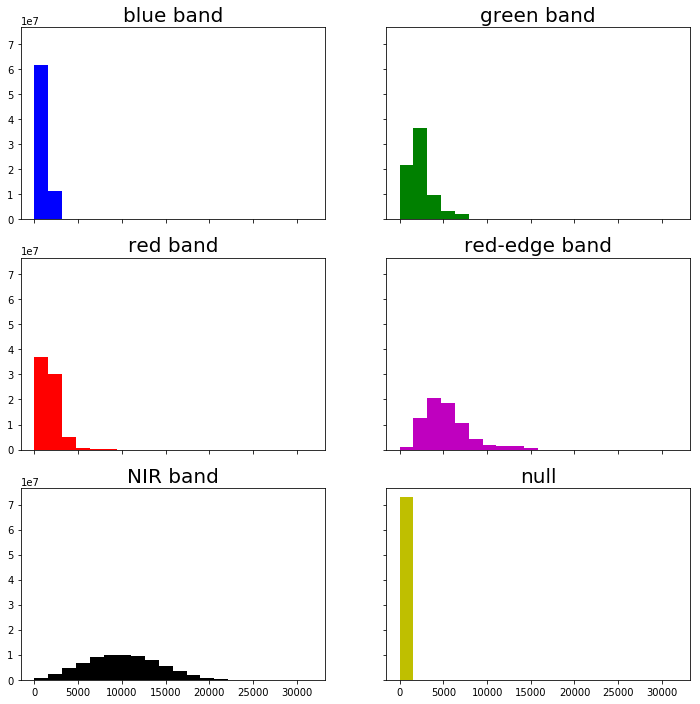

In [3]:
colors = ['b', 'g', 'r', 'm', 'k', 'y']
titles = ['blue band', 'green band', 'red band', 'red-edge band', 'NIR band', 'null']
ep.hist(saltlake_csf, 
        colors=colors, 
        title=titles, 
        cols=2)
plt.show()

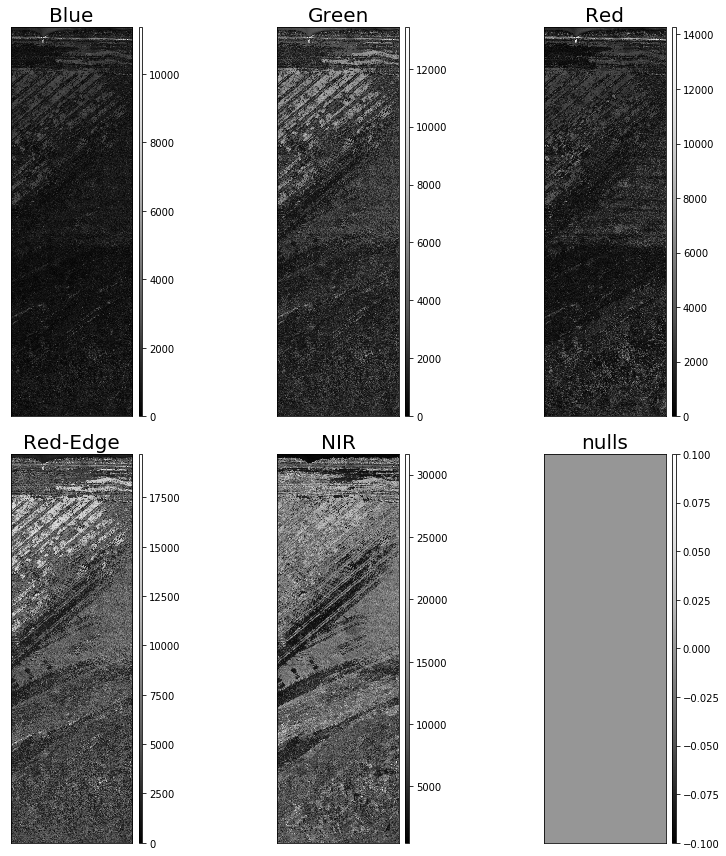

In [4]:
titles = ["Blue", "Green", "Red", "Red-Edge", "NIR", "nulls"]
ep.plot_bands(saltlake_csf,
              scale=False,
             title=titles)
plt.show()

### Create true color composite

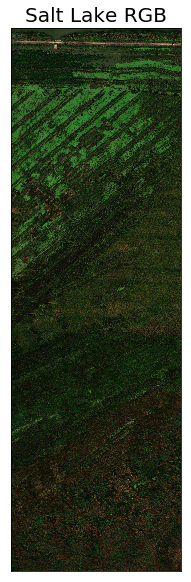

In [5]:
ep.plot_rgb(
    saltlake_csf, rgb=[2, 1, 0], title="Salt Lake RGB"
)
plt.show()

### Create color infrared composite

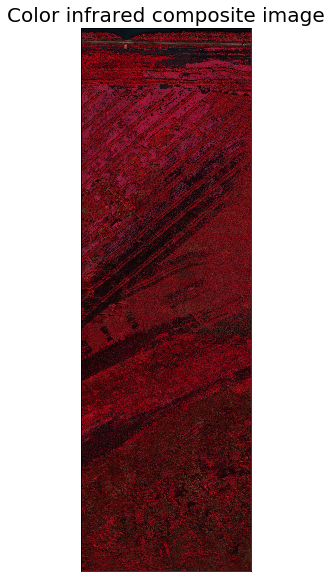

In [6]:
ep.plot_rgb(saltlake_csf,
           rgb=[4, 2, 1],
           title="Color infrared composite image")
plt.show()

### Create false color composite image

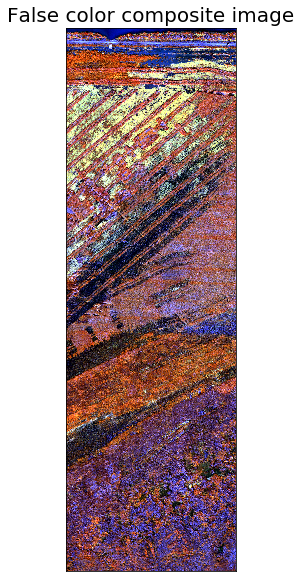

In [7]:
ep.plot_rgb(saltlake_csf,
           rgb=[4, 3, 2],
           title="False color composite image",
           stretch = True)
plt.show()

### Calculate and display NDVI values as an image

The normalized difference vegetation index (NDVI) is the difference of near-infrared reflectance to red reflectance, over the sum of the two bands; NIR-red/NIR+red. The NDVI is the most common index used to show vegetation cover and health.

In [8]:
saltlake_ndvi = es.normalized_diff(saltlake_csf[4], saltlake_csf[2])

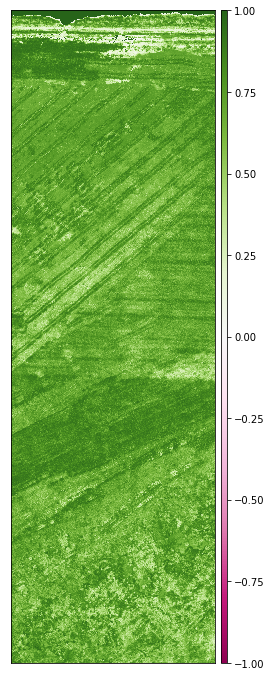

In [9]:
ep.plot_bands(saltlake_ndvi, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()

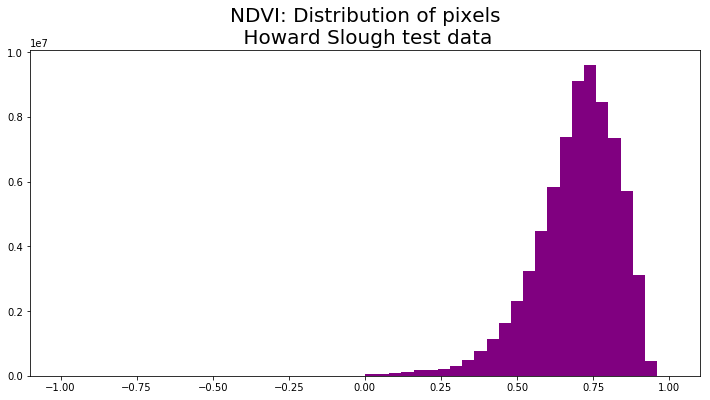

In [10]:
ep.hist(saltlake_ndvi,
        bins = 50,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n Howard Slough test data"],
        hist_range = [-1,1])
plt.show()

The NDVI distribution is skewed to the left; it is not a normal distribution. There are other indices of plant health that may be useful, such as the NDRE.

### Calculate and display NDRE values as an image

The normalized difference red-edge index (NDRE) is the difference of near-infrared reflectance to red-edge reflectance, over the sum of the two bands; NIR-redEdge/NIR+redEdge. The NDRE is very similar to NDVI, but is usually more useful in mid-late growing season. This is because light in the red-edge region penetrate further than light in the red spectrum, and therefore the NDRE is more effective when plants are at their maximum chlorophyll content. https://eos.com/agriculture/ndre/

In [15]:
saltlake_ndre = es.normalized_diff(saltlake_csf[4], saltlake_csf[3])

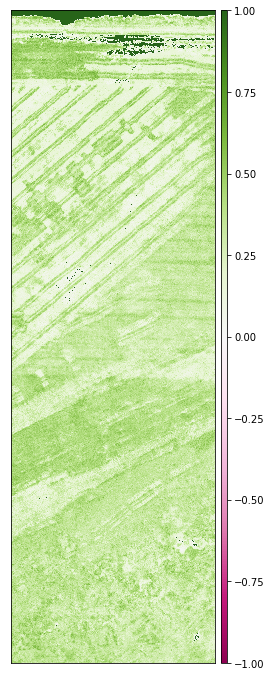

In [16]:
ep.plot_bands(saltlake_ndre, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()

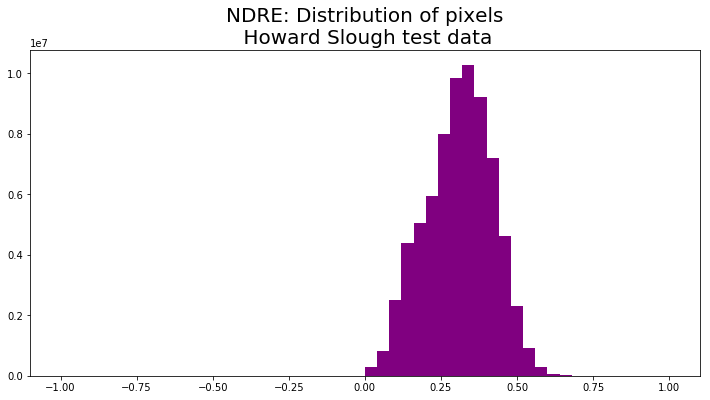

In [17]:
ep.hist(saltlake_ndre,
        bins = 50,
        figsize=(12, 6),
        title=["NDRE: Distribution of pixels\n Howard Slough test data"],
        hist_range = [-1,1])
plt.show()

The NDRE looks very close to a normal distribution, much more so than the NDVI.